In [11]:
from __future__ import division
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import islice
import pickle
import networkx as nx
import random
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn import metrics,model_selection,preprocessing
import warnings
warnings.filterwarnings("ignore")
random.seed(32)
np.random.seed(32)

In [1]:
def all_metric(model,X_test,y_test):
    y_prob = model.predict_proba(X_test)
    f1=metrics.f1_score(y_test,model.predict(X_test))
    print("f1:{}".format(f1))
    y_test_prob=model.predict_proba(X_test)   #y_test_prob.shape=[n_samples, n_classes]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob[:,1])
    auc=metrics.auc(fpr,tpr)
    print("auc:{}".format(auc))
    # roc_auc = auc(fpr, tpr)
#     plt.title('ROC Validation')
#     plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % auc)
#     plt.legend(loc='lower right')
#     plt.plot([0, 1], [0, 1], 'r--')
#     plt.xlim([0, 1])
#     plt.ylim([0, 1])
#     plt.ylabel('True Positive Rate')
#     plt.xlabel('False Positive Rate')
#     plt.show()
    return fpr,tpr
    
def run(model,train_data_file,representation_size,test_size):
    train_data=pd.read_csv(train_data_file)
    train_data = shuffle(train_data)
    feature_columns=[str(i) for i in range(representation_size*2)]
    X = train_data[feature_columns]
    Y = train_data['label']
    # split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=7)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    predictions = [round(value) for value in y_pred]
    # evaluate predictions
    accuracy = accuracy_score(y_test, predictions)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    fpr,tpr=all_metric(model,X_test,y_test)
    return fpr,tpr

In [13]:
print("begin")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()

begin


In [14]:
print("all_connectiveSample_node2vec128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_connectiveSample_node2vec128.csv"
run(model,train_data_file,representation_size,test_size)
print("all_randomSample_node2vec128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_randomSample_node2vec128.csv"
run(model,train_data_file,representation_size,test_size)

all_connectiveSample_node2vec128:
Accuracy: 84.88%
f1:0.8526727509778356
auc:0.9275276635359309
all_randomSample_node2vec128:
Accuracy: 83.57%
f1:0.8386079513458723
auc:0.917397693298776


In [15]:
print("all_connectiveSample_deepwalk128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_connectiveSample_deepwalk128.csv"
run(model,train_data_file,representation_size,test_size)
print("all_randomSample_deepwalk128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_randomSample_deepwalk128.csv"
run(model,train_data_file,representation_size,test_size)

all_connectiveSample_deepwalk128:
Accuracy: 84.35%
f1:0.8464481284224739
auc:0.9242624593176838
all_randomSample_deepwalk128:
Accuracy: 83.56%
f1:0.8372990353697749
auc:0.9172262900870343


In [16]:
print("Line connection:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_connectiveSample_line128.csv"
run(model,train_data_file,representation_size,test_size)
print("Line random:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_randomSample_line128.csv"
run(model,train_data_file,representation_size,test_size)

Line connection:
Accuracy: 88.60%
f1:0.8864873092583433
auc:0.9558173128197276
Line random:
Accuracy: 89.75%
f1:0.8967905795428307
auc:0.9618064723145731


In [6]:
# print("Hope connection:")
# test_size = 0.2
# representation_size=128 #表征向量的长度
# model =XGBClassifier()#SVC()# LogisticRegression()
# train_data_file="train_data/dgsp_connectiveSample_hope128.csv"
# run(model,train_data_file,representation_size,test_size)
# print("Hope random:")
# test_size = 0.2
# representation_size=128 #表征向量的长度
# model =XGBClassifier()#SVC()# LogisticRegression()
# train_data_file="train_data/dgsp_randomSample_hope128.csv"
# run(model,train_data_file,representation_size,test_size)

In [17]:
print("Sdne connection:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_connectiveSample_sdne128.csv"
run(model,train_data_file,representation_size,test_size)
print("Sdne random:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/all_randomSample_sdne128.csv"
run(model,train_data_file,representation_size,test_size)

Sdne connection:
Accuracy: 85.32%
f1:0.8549848942598188
auc:0.9320264127743991
Sdne random:
Accuracy: 84.62%
f1:0.8467019776702358
auc:0.9244363425304062


In [8]:
# print("Lap connection:")
# test_size = 0.2
# representation_size=128 #表征向量的长度
# model =XGBClassifier()#SVC()# LogisticRegression()
# train_data_file="train_data/all_connectiveSample_lap128.csv"
# run(model,train_data_file,representation_size,test_size)
# print("Lap random:")
# test_size = 0.2
# representation_size=128 #表征向量的长度
# model =XGBClassifier()#SVC()# LogisticRegression()
# train_data_file="train_data/all_randomSample_lap128.csv"
# run(model,train_data_file,representation_size,test_size)

In [9]:
print("Gf connection:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/dgsp_connectiveSample_gf128.csv"
run(model,train_data_file,representation_size,test_size)
print("Gf random:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="train_data/dgsp_randomSample_gf128.csv"
run(model,train_data_file,representation_size,test_size)

Gf connection:
Accuracy: 84.28%
f1:0.8450205358152154
auc:0.9231824615511243
Gf random:
Accuracy: 87.05%
f1:0.8714036286343277
auc:0.9423743904099016


In [10]:
#-----------下面是斯坦福公开数据集-----------------------------------------------------------

In [36]:
#256
print("dg_connectiveSample_node2vec128:")
test_size = 0.2
representation_size=256 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_node2vec128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_node2vec128:")
test_size = 0.2
representation_size=256 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_node2vec128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_node2vec128:
Accuracy: 92.20%
f1:0.7096247960848289
auc:0.9621966726553514
dg_randomSample_node2vec128:
Accuracy: 91.79%
f1:0.6908491343775763
auc:0.9618583013557701


In [27]:
print("dg_connectiveSample_deepwalk128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_deepwalk128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_deepwalk128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_deepwalk128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_deepwalk128:
Accuracy: 92.09%
f1:0.6917164816396243
auc:0.9561707540759276
dg_randomSample_deepwalk128:
Accuracy: 91.73%
f1:0.6823727387463189
auc:0.9591046514218835


In [28]:
#3 128
print("dg_connectiveSample_line128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_line128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_line128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_line128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_line128:
Accuracy: 92.42%
f1:0.7225340817963112
auc:0.966350891916674
dg_randomSample_line128:
Accuracy: 92.50%
f1:0.7091295116772824
auc:0.9641488750192392


In [34]:
#1 64
print("dg_connectiveSample_line128:")
test_size = 0.2
representation_size=64 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_line128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_line128:")
test_size = 0.2
representation_size=64 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_line128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_line128:
Accuracy: 92.33%
f1:0.7126436781609196
auc:0.9598975223377437
dg_randomSample_line128:
Accuracy: 91.98%
f1:0.7038834951456312
auc:0.9589177700911036


In [29]:
print("dg_connectiveSample_hope128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_hope128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_hope128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_hope128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_hope128:
Accuracy: 93.08%
f1:0.74740207833733
auc:0.9734711399808469
dg_randomSample_hope128:
Accuracy: 92.86%
f1:0.7520912547528519
auc:0.9719991365680914


In [30]:
print("dg_connectiveSample_sdne128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_sdne128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_sdne128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_sdne128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_sdne128:
Accuracy: 91.78%
f1:0.6890269151138717
auc:0.945595071501072
dg_randomSample_sdne128:
Accuracy: 91.71%
f1:0.6906416019615855
auc:0.9459893645527427


In [31]:
print("dg_connectiveSample_lap128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_lap128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_lap128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_lap128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_lap128:
Accuracy: 85.73%
f1:0.004583651642475172
auc:0.598672917242808
dg_randomSample_lap128:
Accuracy: 86.23%
f1:0.004750593824228029
auc:0.6131887114463335


In [32]:
print("dg_connectiveSample_gf128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_connectiveSample_gf128.csv"
run(model,train_data_file,representation_size,test_size)
print("dg_randomSample_gf128:")
test_size = 0.2
representation_size=128 #表征向量的长度
model =XGBClassifier()#SVC()# LogisticRegression()
train_data_file="stanford_data/dg_randomSample_gf128.csv"
run(model,train_data_file,representation_size,test_size)

dg_connectiveSample_gf128:
Accuracy: 91.87%
f1:0.6831767719897524
auc:0.9571760540002213
dg_randomSample_gf128:
Accuracy: 91.58%
f1:0.6616805983282006
auc:0.956719663617169


begin
Accuracy: 91.06%
f1:0.9113524434903397
auc:0.9707501947872943


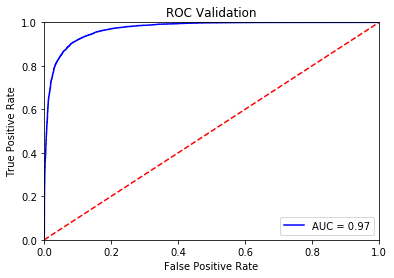

In [14]:
print("begin")
train_data_file="train_data/dg_connective_hope128_traindata.csv"
run(model,train_data_file,representation_size,test_size)

begin
Accuracy: 89.62%
f1:0.8952882946583531
auc:0.9625750158550836


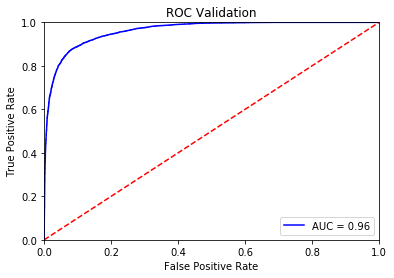

In [15]:
print("begin")
train_data_file="train_data/dg_random_hope128_traindata.csv"
run(model,train_data_file,representation_size,test_size)

In [4]:
# train_data=pd.read_csv(data_path)#,index_col=0
# train_data = shuffle(train_data)

# print(train_data.shape)
# train_data.head()

# train_data = shuffle(train_data)
# train_data['label'][:10]
# representation_size=128 #表征向量的长度
# number_walks=40  #每个节点随机游走序列数量
# walk_length=10   #每个随机游走序列的长度
# workers=8        #并行数量
# window_size=10   #skip-gram提取词的上下文数量
# #node2vec参数
# q=0.25
# p=0.25

#ALLNET
representation_size=128 #表征向量的长度
print("begin")
#基于边的
feature_columns=[str(i) for i in range(representation_size*2)]
X = train_data[feature_columns]
Y = train_data['label']
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
print("end")

begin
end


In [5]:
# fit model no training data
print('begin:')
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)
y_prob = clf_rf.predict_proba(X_test)
# model = XGBClassifier()
# model.fit(X_train, y_train)
# make predictions for test data
# y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

begin:
Accuracy: 91.99%


In [10]:
from sklearn.linear_model import LogisticRegression

# fit model no training data
print('begin:')
clf_lg = LogisticRegression()
clf_lg.fit(X_train, y_train)
y_pred = clf_lg.predict(X_test)
y_prob = clf_lg.predict_proba(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

begin:
Accuracy: 83.72%


In [9]:
y_pred = clf_rf.predict(X_train)
# y_prob = clf_rf.predict_proba(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_train, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


In [14]:
# from sklearn.svm import SVC
# # fit model no training data
# print('begin:')
# clf_svc = SVC()
# clf_svc.fit(X_train, y_train)
# y_pred = clf_svc.predict(X_test)
# # y_prob = clf.predict_proba(X_test)
# # model = XGBClassifier()
# # model.fit(X_train, y_train)
# # make predictions for test data
# # y_pred = model.predict(X_test)
# predictions = [round(value) for value in y_pred]
# # evaluate predictions
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

0.9197740112994351
0.9745039642975833


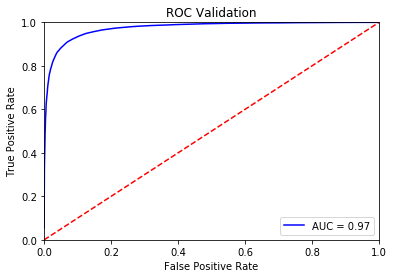

In [7]:
all_metric(clf_rf,X_test,y_test)

In [17]:
# fpr,tpr,thresholds=metrics.roc_curve(y_test,clf_rf.decision_function(X_test),pos_label=1)
# auc=metrics.auc(fpr,tpr)
# print(auc)

In [8]:
# fit model no training data
print('begin:')
clf_xg = XGBClassifier()
clf_xg.fit(X_train, y_train)
y_pred = clf_xg.predict(X_test)
y_prob = clf_xg.predict_proba(X_test)
# model = XGBClassifier()
# model.fit(X_train, y_train)
# make predictions for test data
# y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

begin:


/home/wumx/anaconda3/envs/OpenNE/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Accuracy: 97.28%


/home/wumx/anaconda3/envs/OpenNE/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9731999924666176
0.9959803059685413


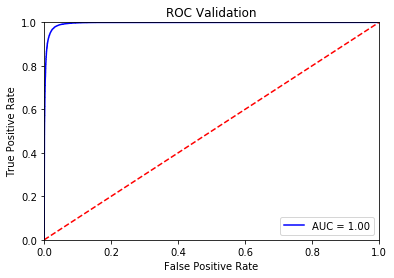

In [9]:
all_metric(clf_xg,X_test,y_test)